In [50]:
import wikipediaapi
import requests
import pandas 
import os
import sys
import pandas as pd
from datasets import load_dataset, load_from_disk
import pickle
import seaborn as sns
import numpy as np

# Wikipedia

In [83]:
dataset_name = "wikimedia/wikipedia"
version = "20231101.en"
cache_dir = "/share/goyal/lio/dataset/huggingface"
ds = load_dataset(dataset_name, version, cache_dir=cache_dir)

Resolving data files:   0%|          | 0/41 [00:00<?, ?it/s]

Loading dataset shards:   0%|          | 0/41 [00:00<?, ?it/s]

## Sample 50K wiki entries

In [84]:
sampled_dataset = ds['train'].shuffle(seed=42).select(range(200000))
filename = '/share/goyal/lio/dataset/huggingface/wikipedia_20231101.en_sample_n=200000_seed=42'
sampled_dataset.save_to_disk(filename)

Saving the dataset (0/2 shards):   0%|          | 0/200000 [00:00<?, ? examples/s]

In [61]:
sampled_dataset = load_from_disk(filename)

In [66]:
raw_sample_df = sampled_dataset.to_pandas()

# Selected Sample

In [8]:
sys.path.insert(0 ,'/home/al2644/research')

In [9]:
from codebase.wiki_entities_knowledge import prompts
import importlib; importlib.reload(prompts)
import openaiAPI

from openaiAPI import generate_response
from codebase.wiki_entities_knowledge import prompts
from codebase.wiki_entities_knowledge.prompts import *
import importlib; importlib.reload(prompts)

<module 'codebase.wiki_entities_knowledge.prompts' from '/home/al2644/research/codebase/wiki_entities_knowledge/prompts.py'>

In [101]:
root = '/share/goyal/lio/knowledge_update/wikipedia/20231101.en/'
filename = 'select_sample_input.csv'
input_df = pd.read_csv(os.path.join(root, filename))

In [102]:
input_df

,id,url,title,text
0,2076,https://en.wikipedia.org/wiki/Acropolis%20of%2...,Acropolis of Athens,The Acropolis of Athens (; ) is an ancient cit...
1,4675,https://en.wikipedia.org/wiki/British%20Museum,British Museum,The British Museum is a public museum dedicate...
2,4848143,https://en.wikipedia.org/wiki/New%20York%20Yan...,New York Yankees,The New York Yankees are an American professio...
3,5422657,https://en.wikipedia.org/wiki/Cayan%20Tower,Cayan Tower,"Cayan Tower, known as Infinity Tower before it..."
4,5823201,https://en.wikipedia.org/wiki/Brenner%20Base%2...,Brenner Base Tunnel,The Brenner Base Tunnel (; ) is a railway tun...
5,7688189,https://en.wikipedia.org/wiki/Oktoberfest,Oktoberfest,Oktoberfest (; ) is the world's largest Volksf...
6,7954422,https://en.wikipedia.org/wiki/Cornell%20Univer...,Cornell University,Cornell University is a private Ivy League lan...
7,12279110,https://en.wikipedia.org/wiki/Bill%20Ackman,Bill Ackman,"William Albert Ackman (born May 11, 1966) is a..."
8,15658254,https://en.wikipedia.org/wiki/Fast%20%26%20Fur...,Fast & Furious,Fast & Furious (also known as The Fast and the...
9,25173473,https://en.wikipedia.org/wiki/Sundar%20Pichai,Sundar Pichai,"Pichai Sundararajan (born June 10, 1972), bett..."


# Wiki

## Get page summary

In [99]:
import wikipediaapi

# Initialize Wikipedia API
agent = 'knowledge_udpate (13641361467@gmail.com)'
wiki = wikipediaapi.Wikipedia(agent, 'en')  # 'en' for English Wikipedia
# Replace with the desired page title
page_title = "Python (programming language)"
page = wiki.page(page_title)

In [98]:
page.summary

'Python is a high-level, general-purpose programming language. Its design philosophy emphasizes code readability with the use of significant indentation.\nPython is dynamically typed and garbage-collected. It supports multiple programming paradigms, including structured (particularly procedural), object-oriented and functional programming. It is often described as a "batteries included" language due to its comprehensive standard library.\nGuido van Rossum began working on Python in the late 1980s as a successor to the ABC programming language and first released it in 1991 as Python 0.9.0. Python 2.0 was released in 2000. Python 3.0, released in 2008, was a major revision not completely backward-compatible with earlier versions. Python 2.7.18, released in 2020, was the last release of Python 2.\nPython consistently ranks as one of the most popular programming languages, and has gained widespread use in the machine learning community.'

## Get page view

In [58]:
file_path = '/share/goyal/lio/knowledge_update/wikipedia/wiki_pageview/monthly_avg_20221201_20231130_page_view_samplen=50000.pickle'

In [59]:
with open(file_path, 'rb') as f:
    result = pickle.load(f)

In [19]:
pageview_df = pd.DataFrame.from_dict(result, orient = 'index').reset_index().rename(columns = {'index': 'title', 0: 'avg_monthly_page_view'})

In [42]:
qtiles = list(qtile/ 100 for qtile in range(0, 100, 10))
cap_pageview_df = pageview_df.copy()
low, up = cap_pageview_df['avg_monthly_page_view'].quantile(0.02), cap_pageview_df['avg_monthly_page_view'].quantile(0.98)
cap_pageview_df = cap_pageview_df[cap_pageview_df['avg_monthly_page_view'].between(low, up)]

describe_df = cap_pageview_df['avg_monthly_page_view'].describe(qitles).reset_index()
describe_df

,index,avg_monthly_page_view
0,count,46150.000000
1,mean,523.528646
2,std,1150.237051
3,min,19.000000
4,0%,19.000000
5,10%,35.000000
6,20%,51.000000
7,30%,68.000000
8,40%,91.000000
9,50%,126.000000


In [95]:
cap_pageview_df['avg_monthly_page_view'].describe([0.9, 0.925, 0.95, 0.975])

count    46150.000000
mean       523.528646
std       1150.237051
min         19.000000
50%        126.000000
90%       1288.000000
92.5%     1747.825000
95%       2546.000000
97.5%     4237.550000
max       9673.000000
Name: avg_monthly_page_view, dtype: float64

In [93]:
pageview_df[pageview_df['avg_monthly_page_view'].between(1000, 2000)].sample(60)

,title,avg_monthly_page_view
13554,Navua F.C.,1975
7935,Total Recall,1090
39217,Amphitheatre of Capua,1316
32828,Scoopula,1590
894,High Time (MC5 album),1758
8510,Galia Lahav,1062
15101,Karakat Lok Sabha constituency,1206
10887,Sammy Woodhouse,1333
17436,Mohammad Nizar Jamaluddin,1161
25555,The Lower Depths (1957 film),1877


In [94]:
raw_sample_df[raw_sample_df['title'].str.lower() == 'Laskiainen'.lower()]['text'].iloc[0]

'Laskiainen () is a celebration with Finnish origins, which includes both pagan and ecclesiastic traditions, and is often described as a "mid-winter sliding festival". \n\nIn clerical sense, Laskiainen is associated with Shrove Tuesday (a.k.a. Fat Tuesday) and is a celebration of the beginning of Lent that takes place before Easter. In Northern Europe, this tradition has been practiced from at least the 7th century onward, and in Catholic countries – in form of carnivals – even before that.\n\nLaskiainen in Finland\n\nEtymology \nThe etymology of the word "laskiainen" has been uncertain. Candidates for the source of the word have been "laskeutua" ("to descend", as in descent to fasting) or "laskea" ("to count", as in counting days until Easter). According to a third proposal, the word comes from the old Romance term carne lasciare ("to leave meat"), with the latter part having changed into a Finnish form.\n\nAs Laskiainen is called "fettisdag" ("fatty tuesday") in Swedish after the Fre

Text(0.5, 0, 'log10 (avg monthly page view)')

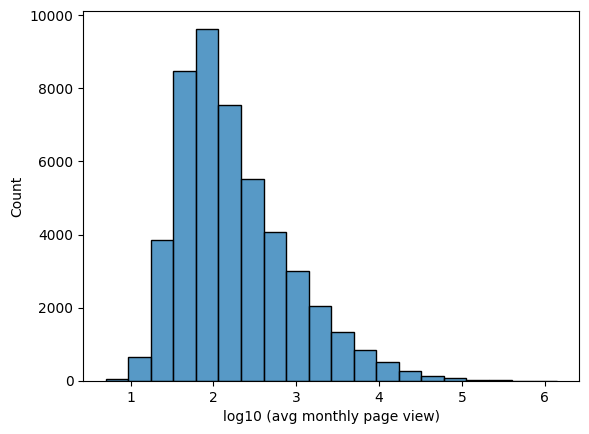

In [54]:
axs = sns.histplot(np.log10(pageview_df['avg_monthly_page_view']), bins=20)
axs.set_xlabel('log10 (avg monthly page view)')